In [1]:
import numpy as np
import pandas as pd

In [2]:
n = 10_000

In [25]:
uncertainty = 0.01

predicted_prob_return = np.random.uniform(size=n) / 2
true_prob_return = np.random.normal(loc=predicted_prob_return, scale=uncertainty)
true_prob_attach = true_prob_return

In [26]:
def reward(p_return, p_return_hat, p_attach):
    
    r = 0
    
    pr = p_return_hat
    
    
    if np.random.uniform() < p_attach:
        # They attached
        r += pr
    
        if np.random.uniform() < p_return:
            r -= 1
        
    return r

In [27]:
total_rewards = []

for _ in range(0, 100):
    rewards = []
    for (p_return, p_return_hat, p_attach) in zip(true_prob_return, predicted_prob_return, true_prob_attach):
        r = reward(p_return, p_return_hat, p_attach)

        rewards.append(r)
    total_rewards.append(np.array(rewards).sum())
    
total_rewards = pd.Series(total_rewards)

0.01
count    100.000000
mean      -0.845496
std       23.868661
min      -49.859262
25%      -16.208801
50%       -0.327812
75%       13.698599
max       55.116883
dtype: float64


<AxesSubplot:>

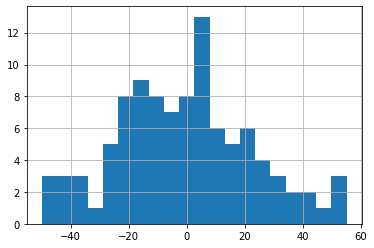

In [28]:
print(uncertainty)
print(total_rewards.describe())
total_rewards.hist(bins=20)

0.05
count    100.000000
mean     -23.291190
std       20.535052
min      -80.885339
25%      -37.957601
50%      -25.092985
75%      -10.662689
max       34.035140
dtype: float64


<AxesSubplot:>

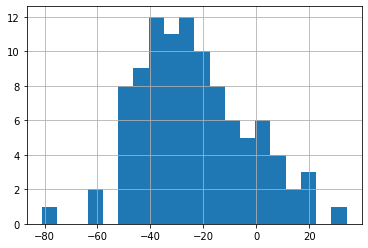

In [24]:
print(uncertainty)
print(total_rewards.describe())
total_rewards.hist(bins=20)

0.1
count    100.000000
mean     -99.288056
std       21.515987
min     -152.621445
25%     -112.912130
50%     -103.598770
75%      -84.247759
max      -44.517138
dtype: float64


<AxesSubplot:>

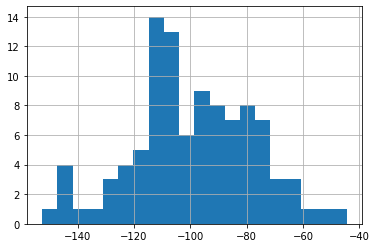

In [62]:
print(uncertainty)
print(total_rewards.describe())
total_rewards.hist(bins=20)

## Add a correction factor (increase price rate to account for uncertainty)

In [47]:
def attach(p_attach):
    if np.random.uniform() < p_attach:
        return True
    return False



def return_(p_return):
    if np.random.uniform() < p_return:
        return True
    return False

In [58]:
def reward(p_return, p_return_hat, p_attach, eps=None):
    
    r = 0
    
    pr = p_return_hat + eps
    
    if attach(p_attach + eps):
        # They attached
        r += pr
    
        if return_(p_return): 
            # Then they returned
            # if they attach 
            r -= 1
        
    return r

In [49]:
uncertainty = 0.01

predicted_prob_return = np.random.uniform(size=n) / 2
true_prob_return = np.random.normal(loc=predicted_prob_return, scale=uncertainty)
true_prob_attach = true_prob_return

In [64]:
print(true_prob_return[0])
print(predicted_prob_return[0])
print(true_prob_attach[0])

0.11059892105527416
0.13128782420523105
0.11059892105527416


In [70]:
rs = []
for i in range(0, 500):
    r = reward(true_prob_return[0], predicted_prob_return[0], true_prob_attach[0], eps=0.01)
    rs.append(r)
    
rs = pd.Series(rs)
print(uncertainty)
print(rs.sum())
rs.value_counts()

0.01
0.324996397545251


 0.000000    434
 0.141288     57
-0.858712      9
dtype: int64

In [59]:
total_rewards = []

for _ in range(0, 100):
    rewards = []
    for (p_return, p_return_hat, p_attach) in zip(true_prob_return, predicted_prob_return, true_prob_attach):
        r = reward(p_return, p_return_hat, p_attach, eps=0.15)

        rewards.append(r)
    total_rewards.append(np.array(rewards).sum())
    
total_rewards = pd.Series(total_rewards)

0.01
count    100.000000
mean     594.860942
std       28.418224
min      518.176564
25%      575.011266
50%      597.764093
75%      613.379276
max      675.888743
dtype: float64


<AxesSubplot:>

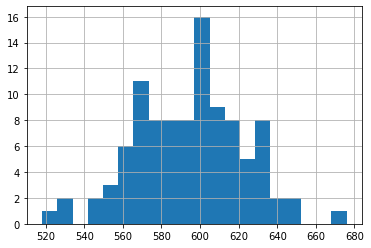

In [51]:
print(uncertainty)
print(total_rewards.describe())
total_rewards.hist(bins=20)